In [1]:
import pandas as pd
import numpy as np

In [2]:
P_ts = []
hours = []

lag_dur = int(np.random.uniform(3, 8))
expo_dur = int(np.random.normal(12, 3))

# Establishing the phases
lag_phase = np.arange(0, lag_dur, 1)
expo_phase = np.arange(lag_dur, lag_dur + expo_dur, 1)
stat_phase = np.arange(lag_dur + expo_dur, lag_dur + expo_dur + 5, 1)
death_phase = np.arange(lag_dur + expo_dur + 5, lag_dur + expo_dur + 5 + 4, 1)

hours = np.concatenate([lag_phase, expo_phase, stat_phase, death_phase]).tolist()
hours = list(set(hours))

In [3]:
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22]

In [14]:
# Assuming the initial population  of a bacterial colony is 10 thousand CFU/mL, the carrying capacity is 100 million CFU/mL, the rate of growth is 0.75, and the death rate is 0.1
def pop_t(P_0=10**4, k=10**8, r=0.75, d=0.1):
    P_ts = []
    
    # Randomizing lag and exponential phase duration
    # Assuming the lag phase lasts for anywhere around 0 to 8 hours max
    # Assuming the exponential phase lasts for anywhere around an average of 12 +- 3 hours
    # Assuming the stationary phase lasts for anywhere around 5 hours
    # Assuming the death phase lasts for anywhere around 4 hours
    
    lag_dur = int(np.random.uniform(3, 10))
    expo_dur = int(np.random.normal(18, 3))

    # Establishing the phases
    lag_phase = np.arange(0, lag_dur, 1)
    expo_phase = np.arange(lag_dur, lag_dur + expo_dur, 1)
    stat_phase = np.arange(lag_dur + expo_dur, lag_dur + expo_dur + 5, 1)
    death_phase = np.arange(lag_dur + expo_dur + 5, lag_dur + expo_dur + 5 + 4, 1)

    # Creating time points
    hours = np.concatenate([lag_phase, expo_phase, stat_phase, death_phase]).tolist()
    hours = list(set(hours))
    
    for i in hours:
        if i in lag_phase:
            P_t = P_0
        elif i in expo_phase:
            P_t = k/(1+((k-P_0)/P_0)*(2.718**-(r*i)))
        elif i in stat_phase:
            P_t = k
        elif i in death_phase:
            P_t = k*(2.718**(-d*(i-(lag_dur + expo_dur + 5))))
        P_ts.append(P_t)
            
    return pd.DataFrame({'t(hrs)': hours, 'P_t(CFU/mL)': P_ts})

In [15]:
pop_t()

,t(hrs),P_t(CFU/mL)
0,0,1.000000e+04
1,1,1.000000e+04
2,2,1.000000e+04
3,3,1.000000e+04
4,4,1.000000e+04
5,5,1.000000e+04
6,6,8.918165e+05
7,7,1.869211e+06
8,8,3.875899e+06
9,9,7.864218e+06


In [16]:
example = pop_t()

In [17]:
import matplotlib.pyplot as plt

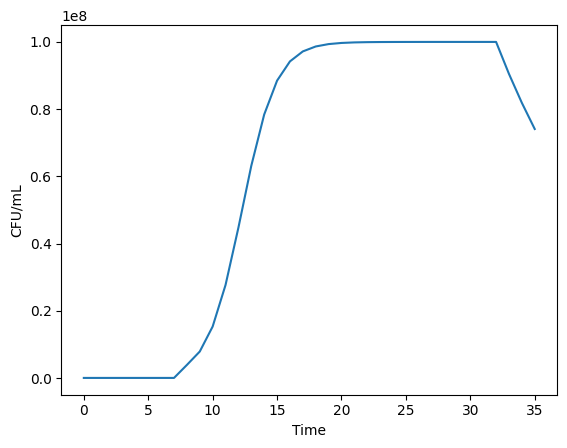

In [18]:
plt.plot(example['t(hrs)'], example['P_t(CFU/mL)'])
plt.xlabel('Time')
plt.ylabel('CFU/mL');

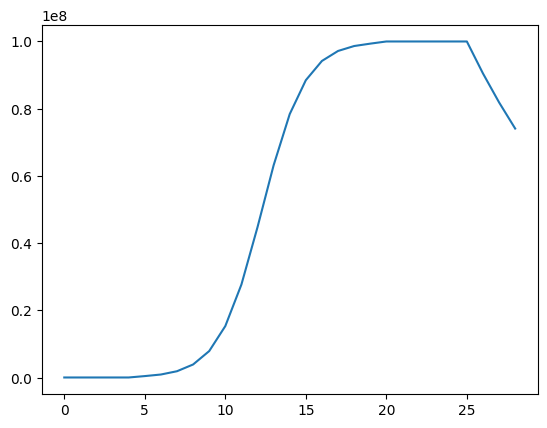

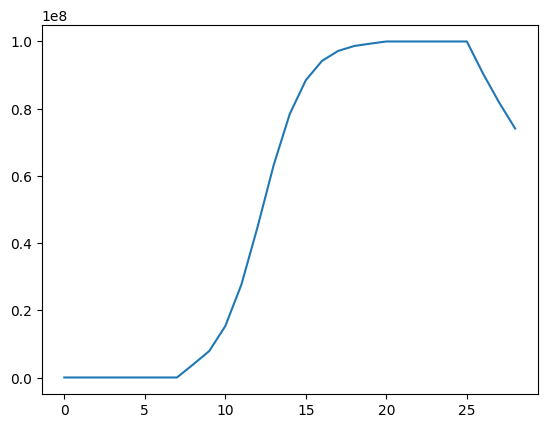

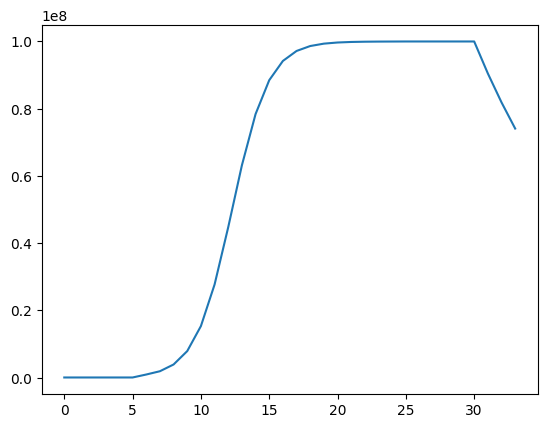

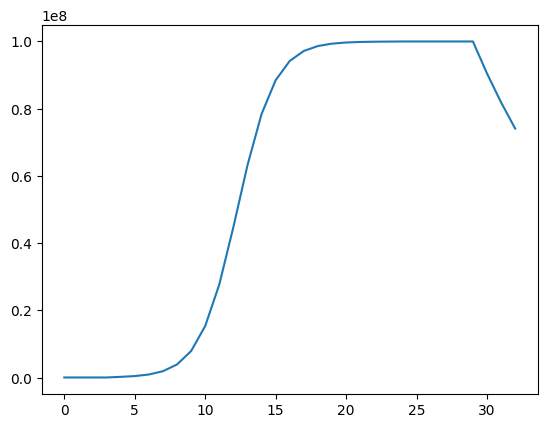

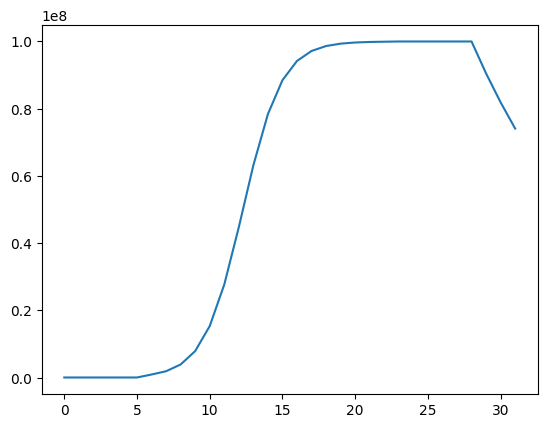

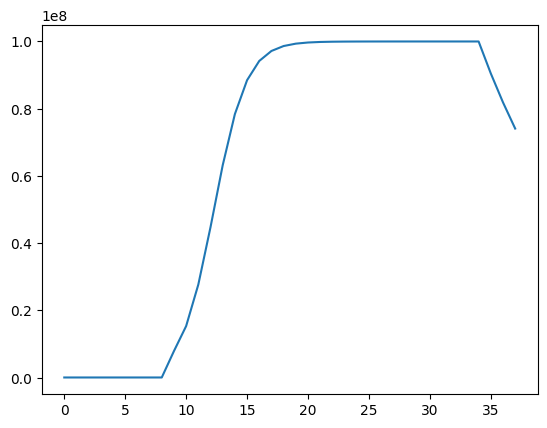

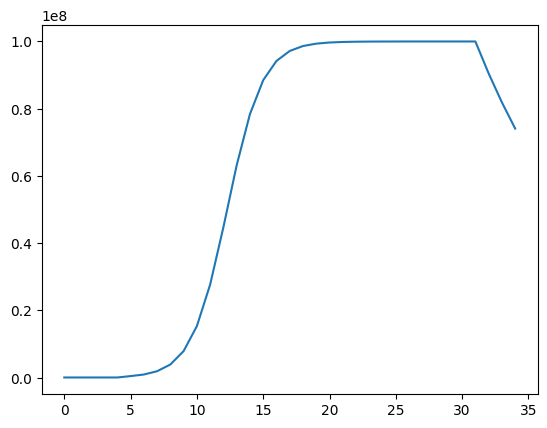

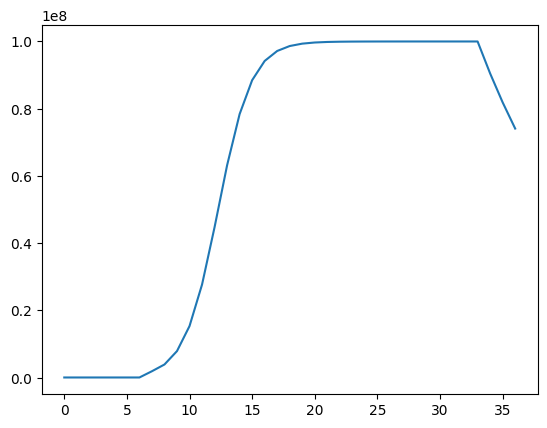

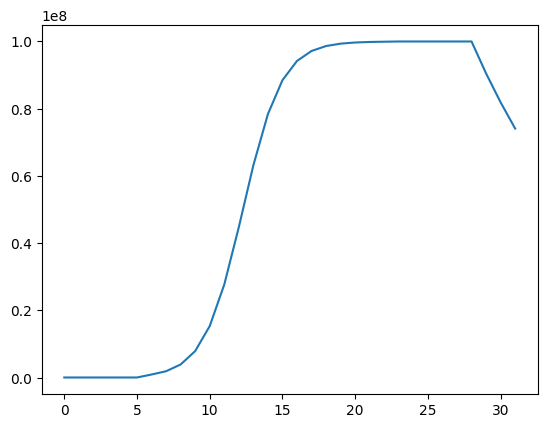

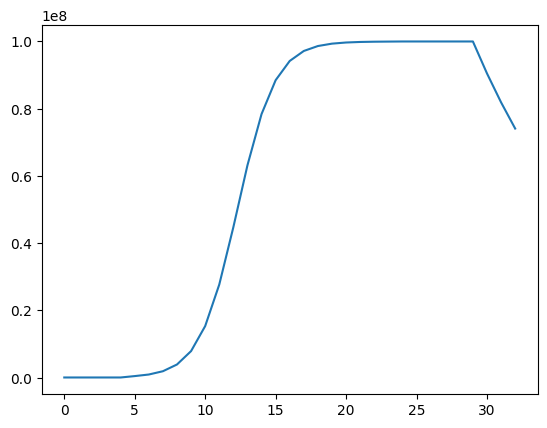

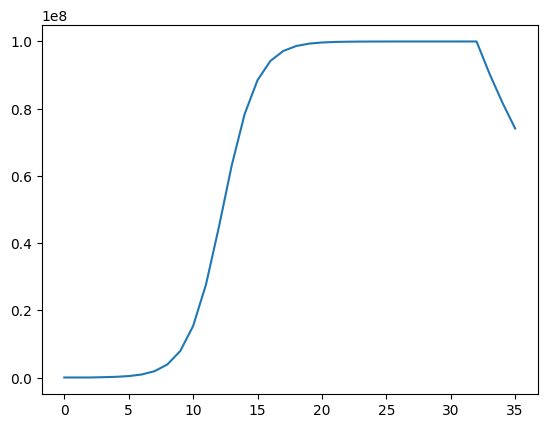

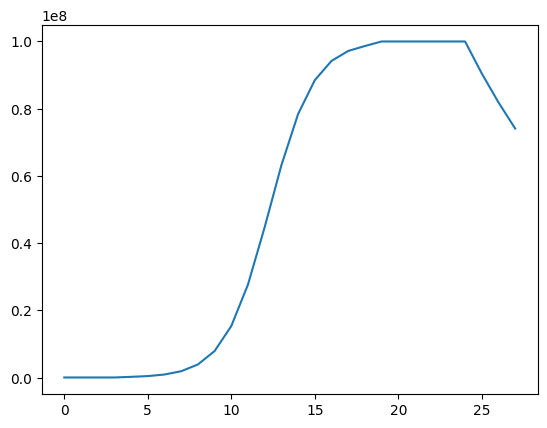

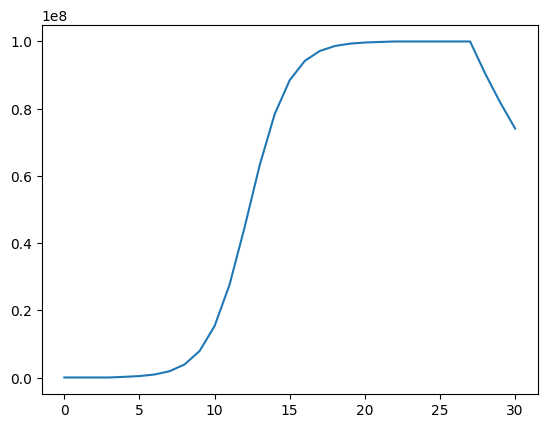

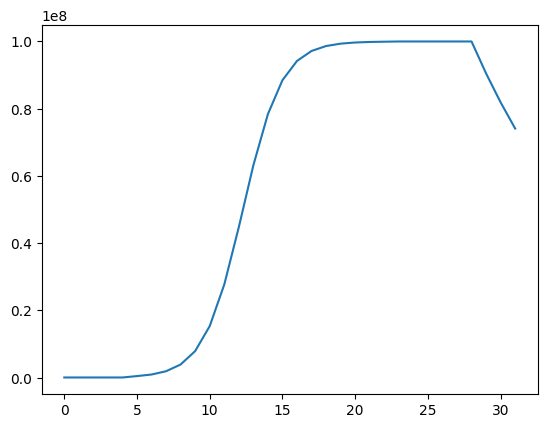

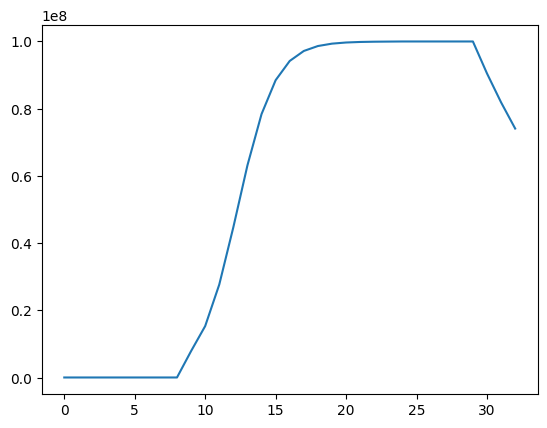

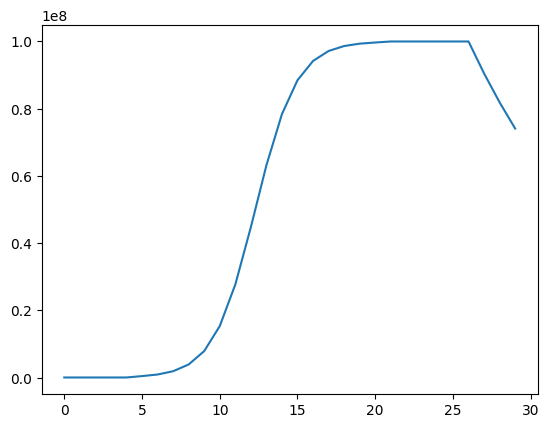

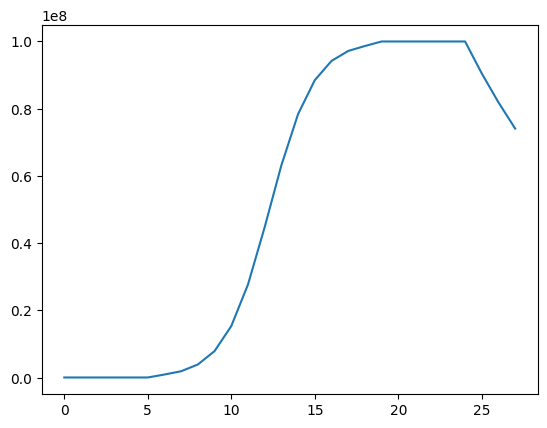

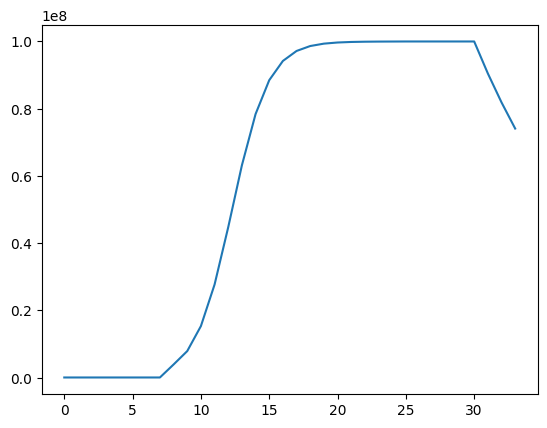

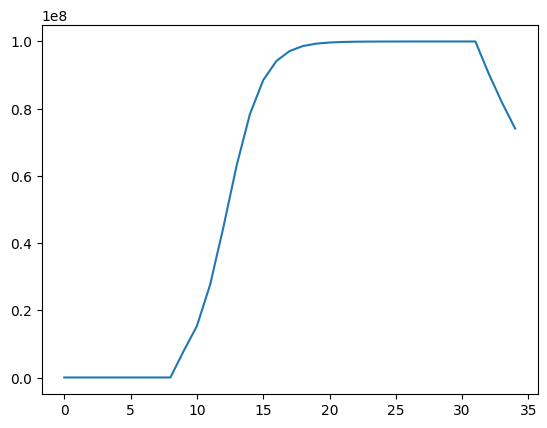

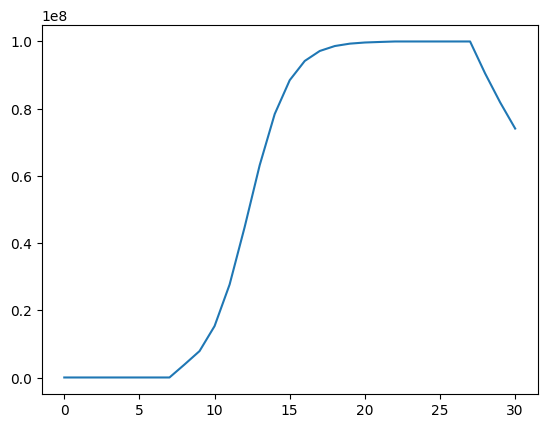

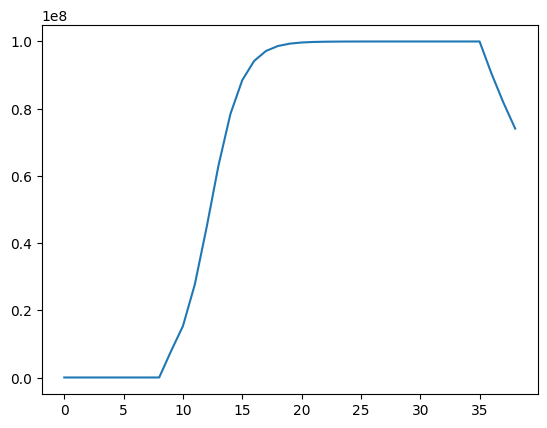

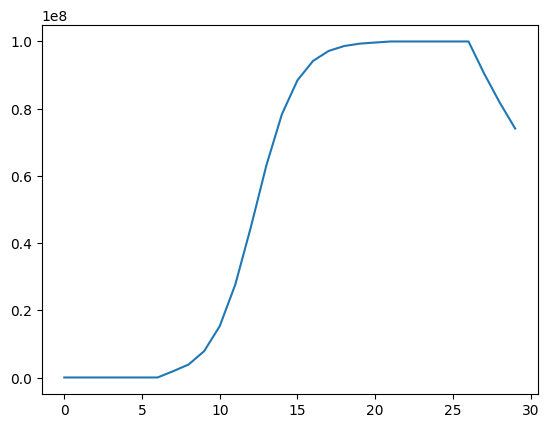

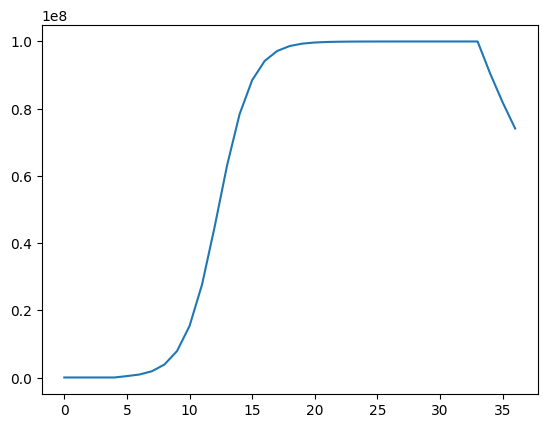

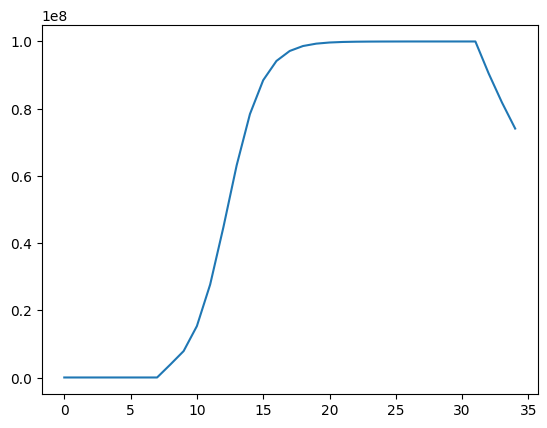

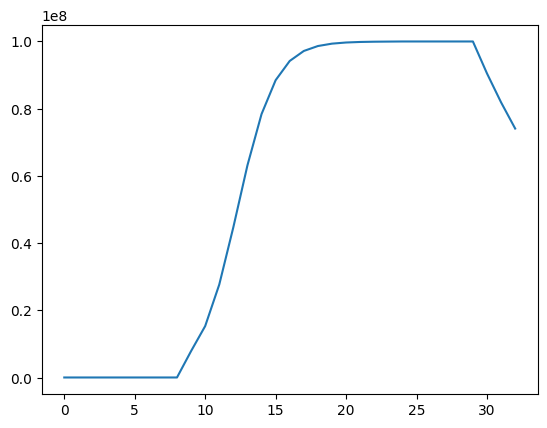

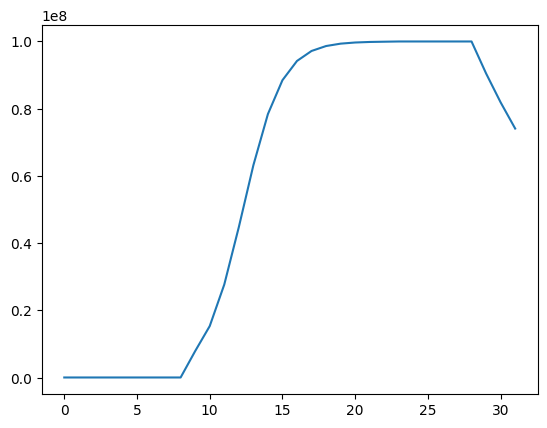

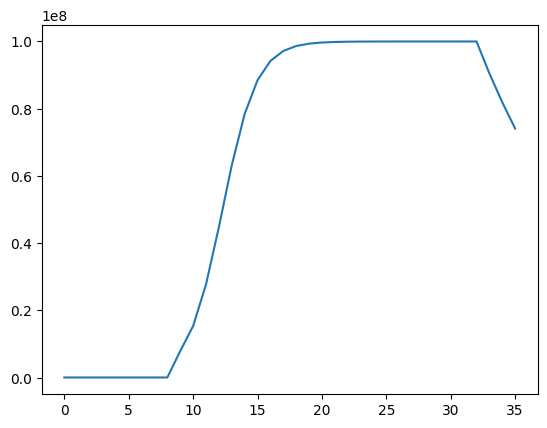

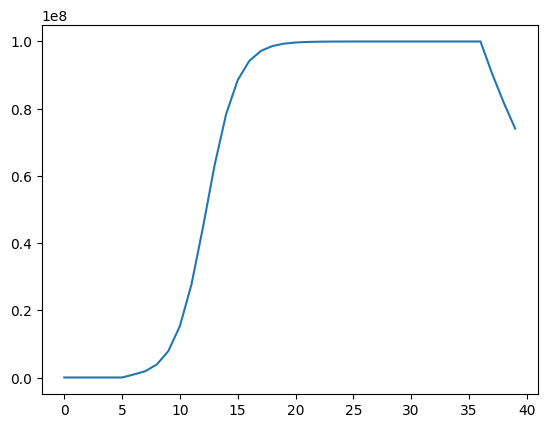

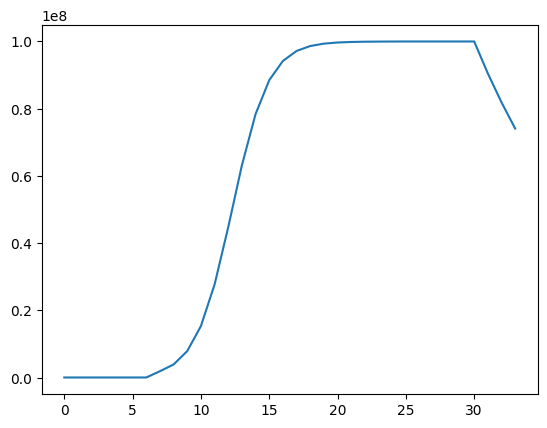

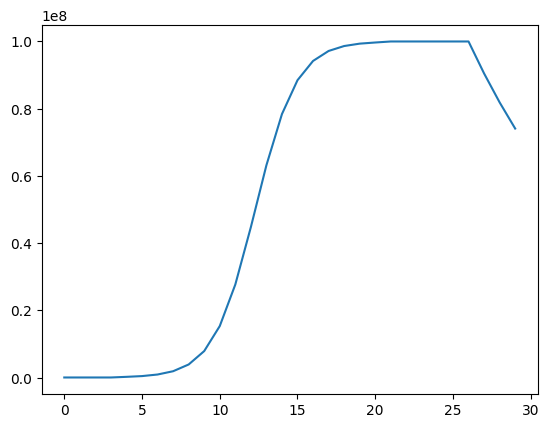

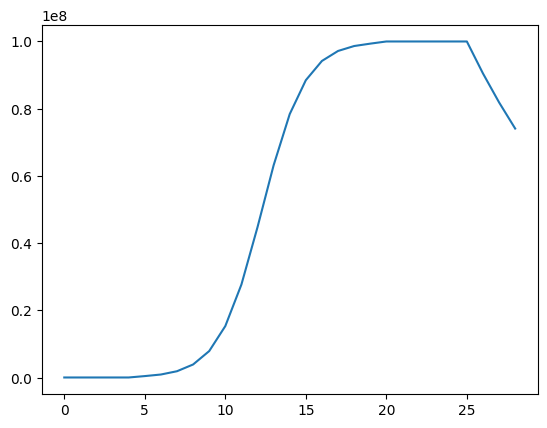

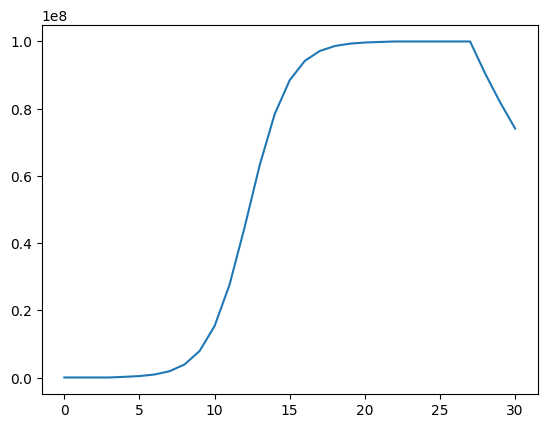

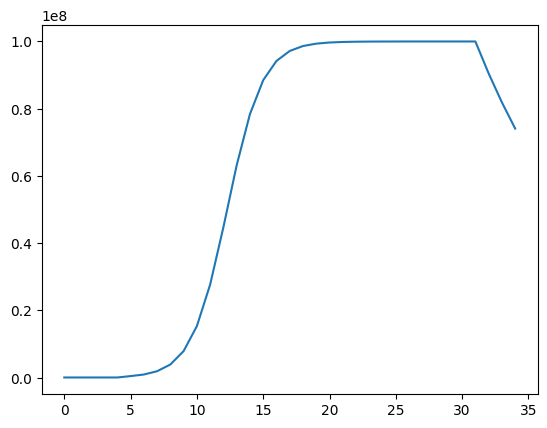

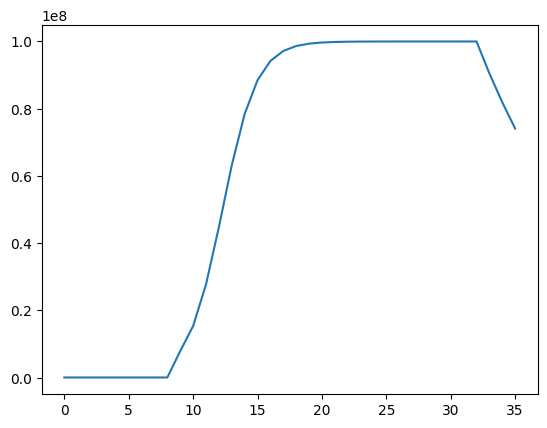

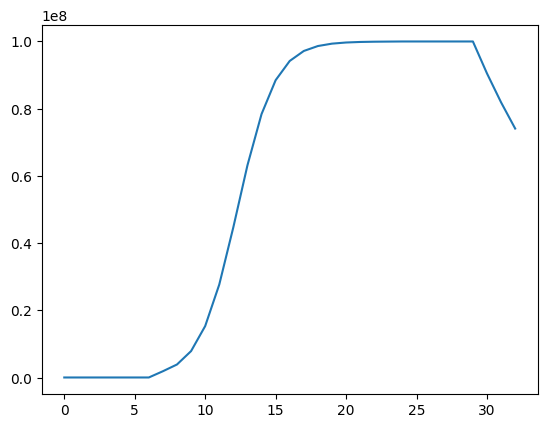

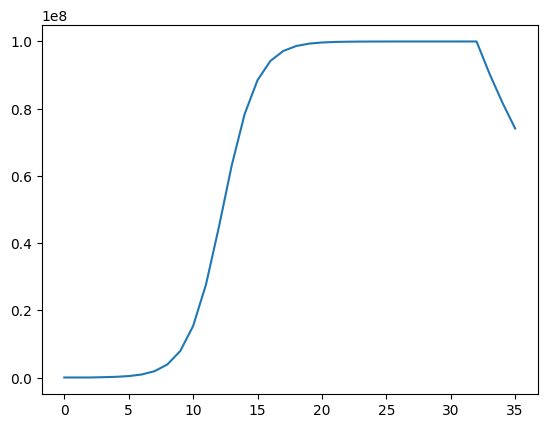

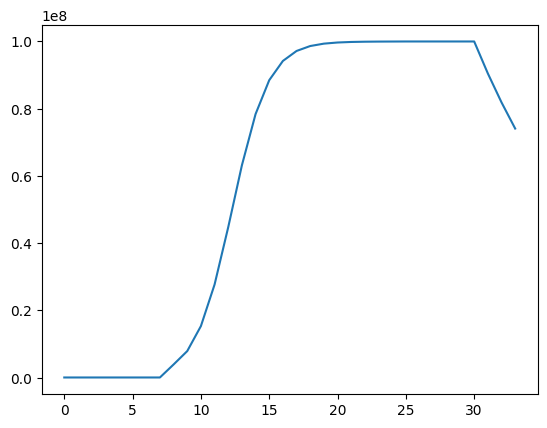

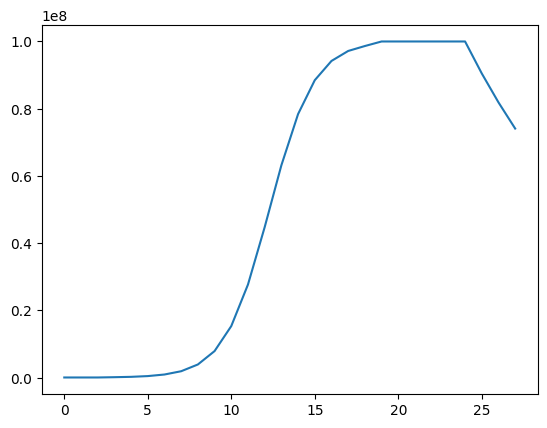

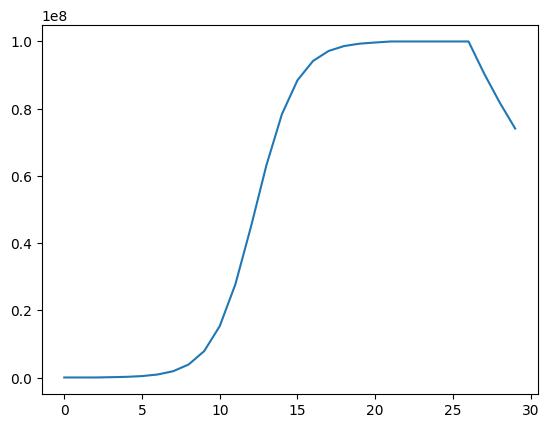

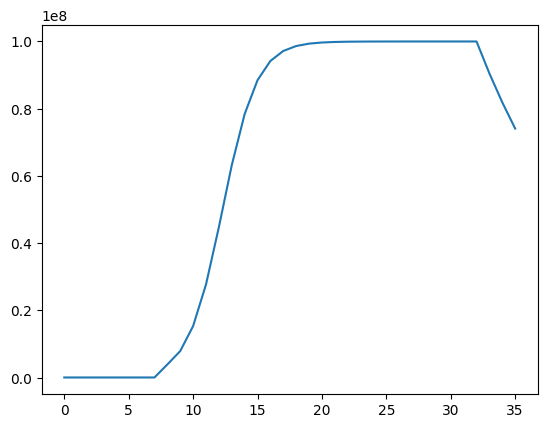

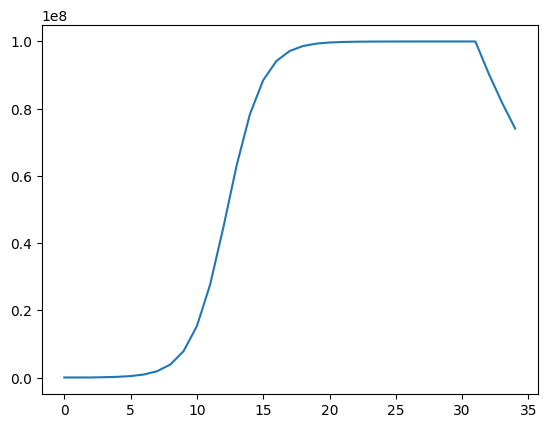

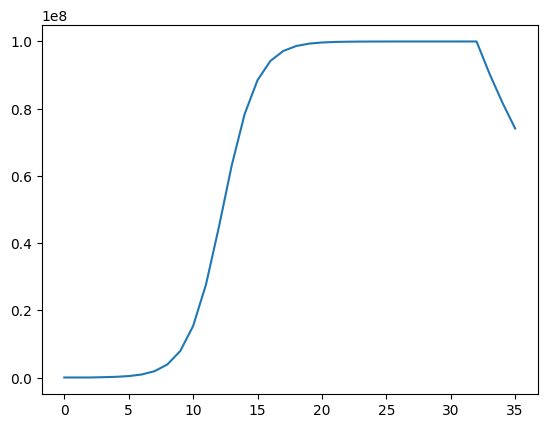

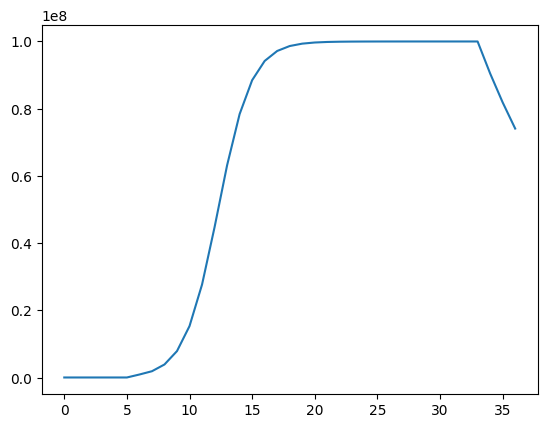

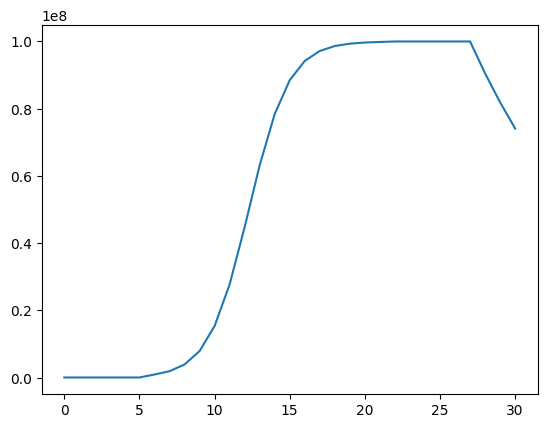

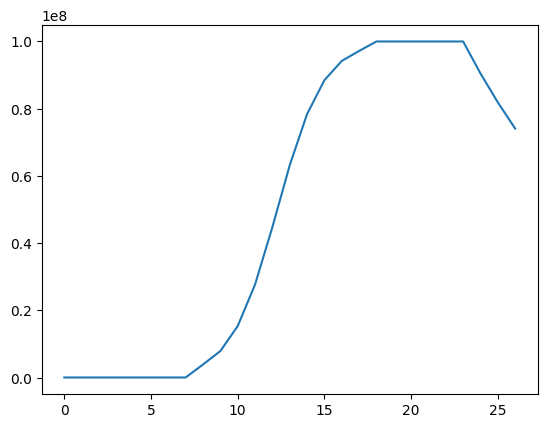

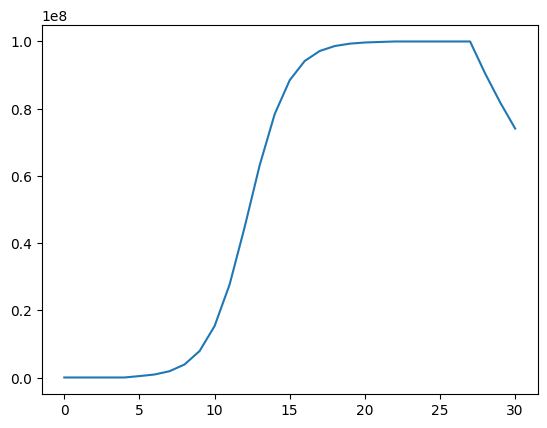

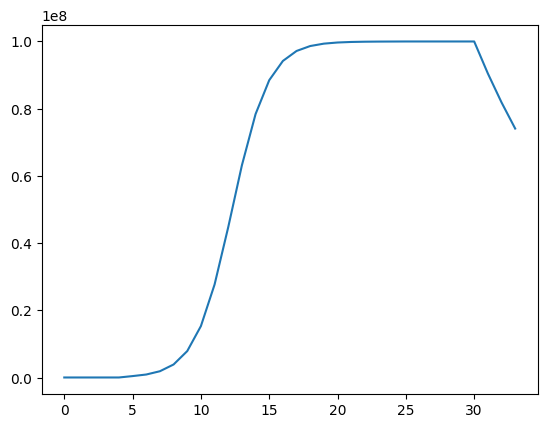

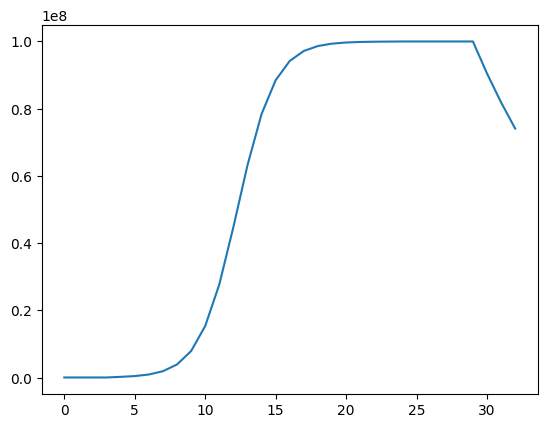

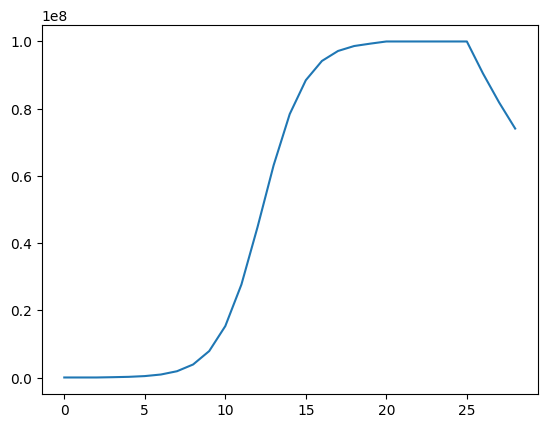

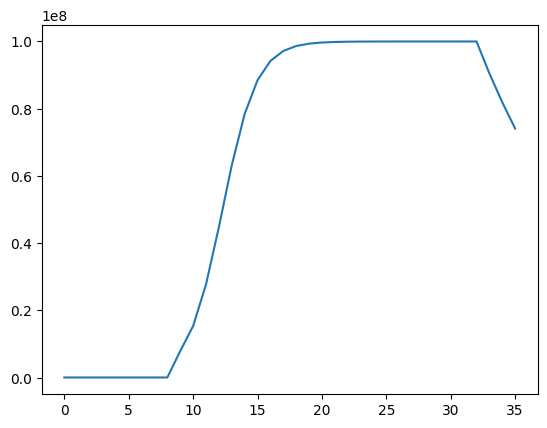

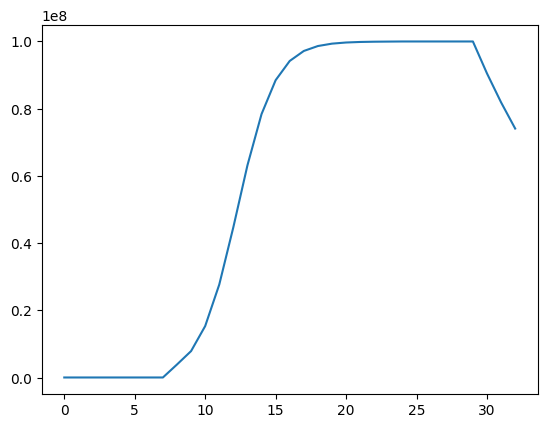

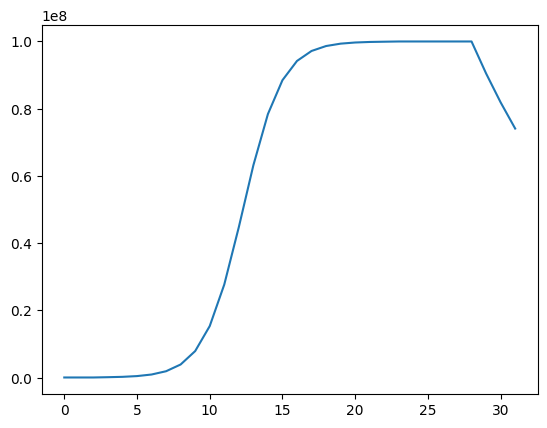

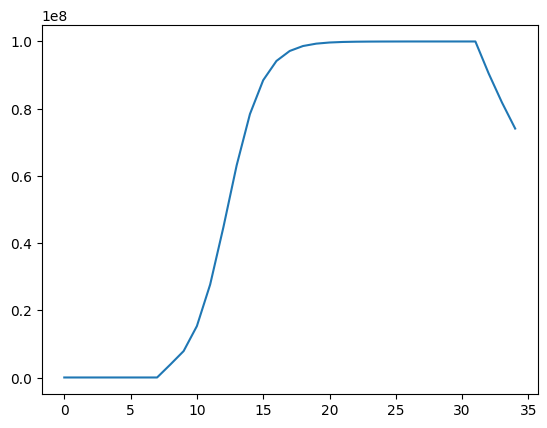

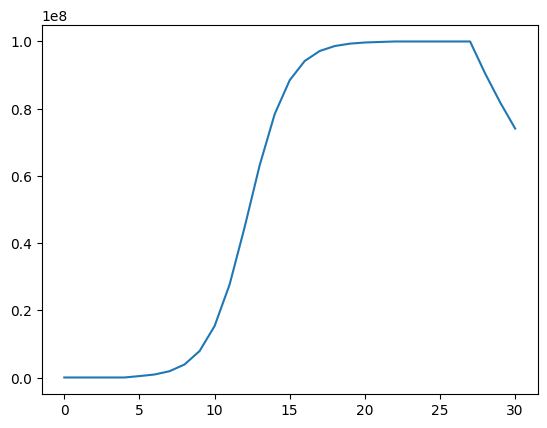

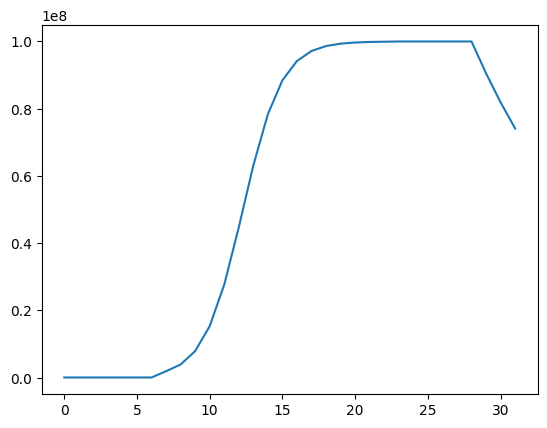

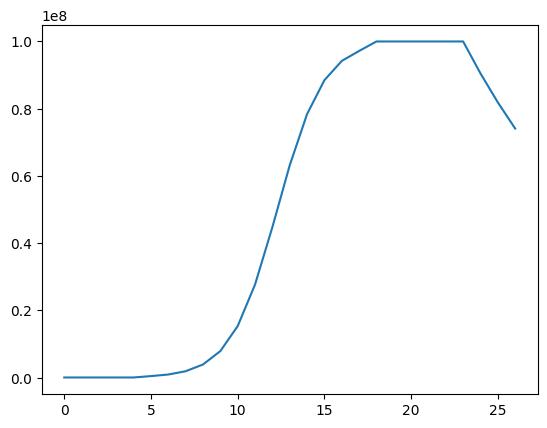

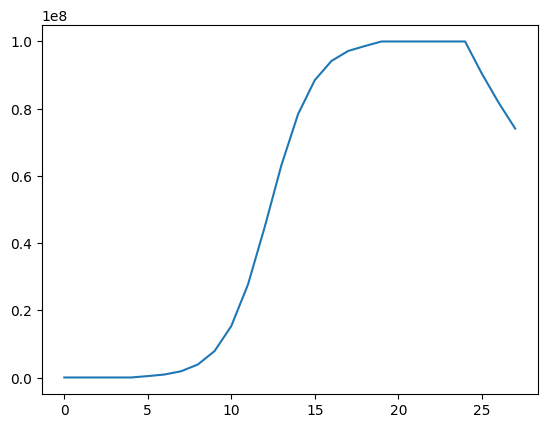

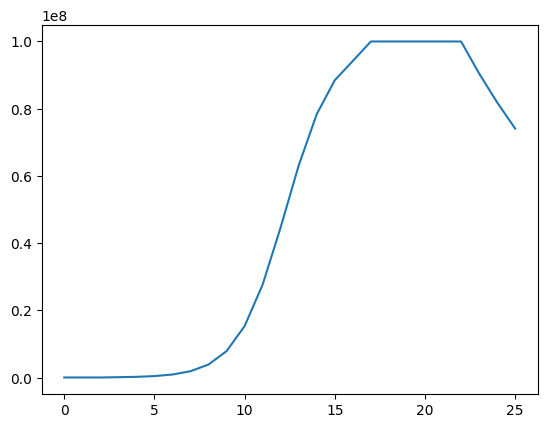

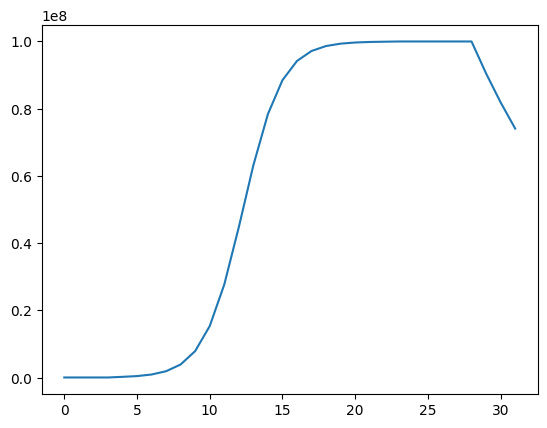

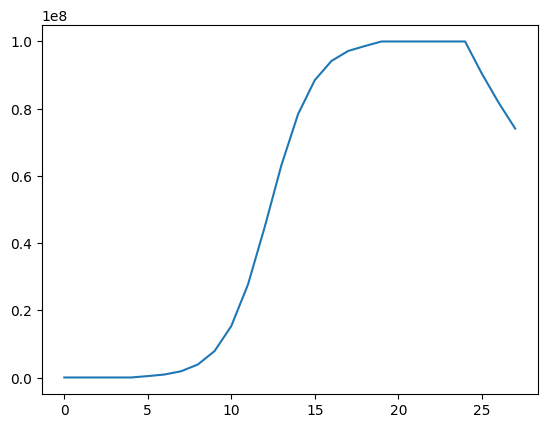

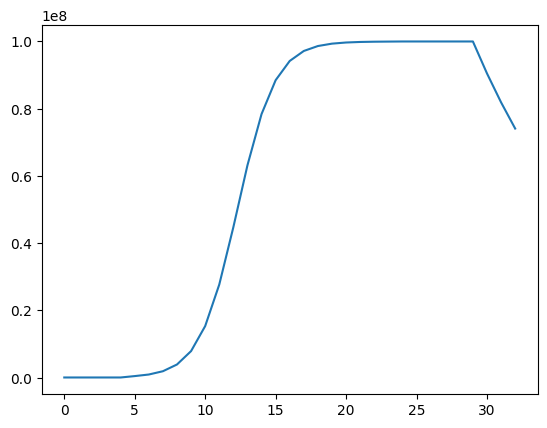

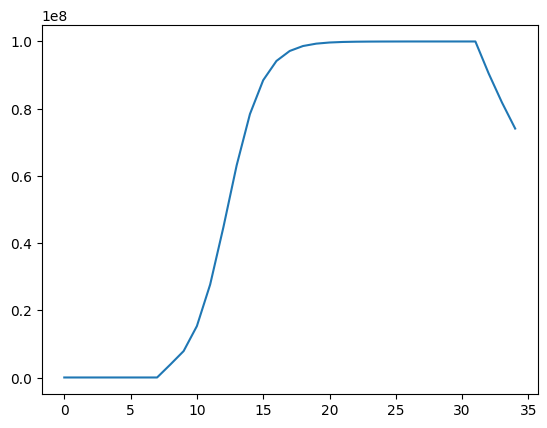

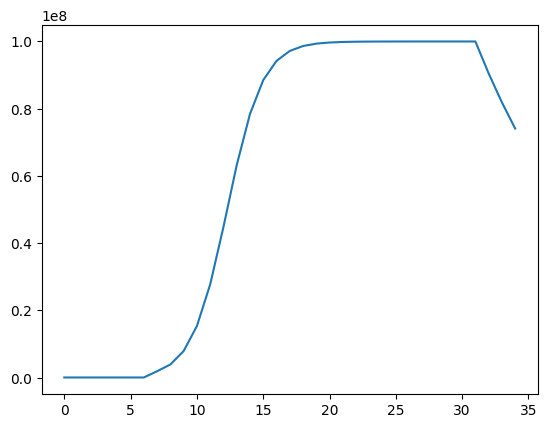

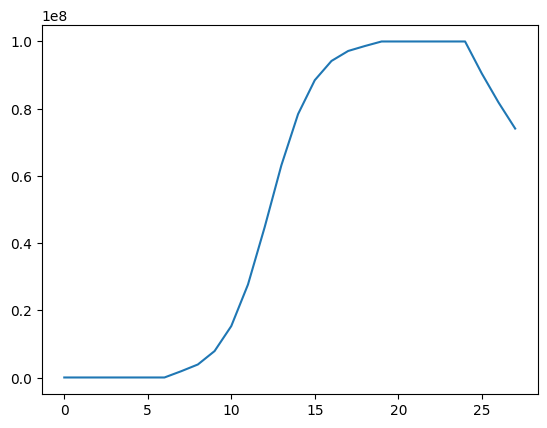

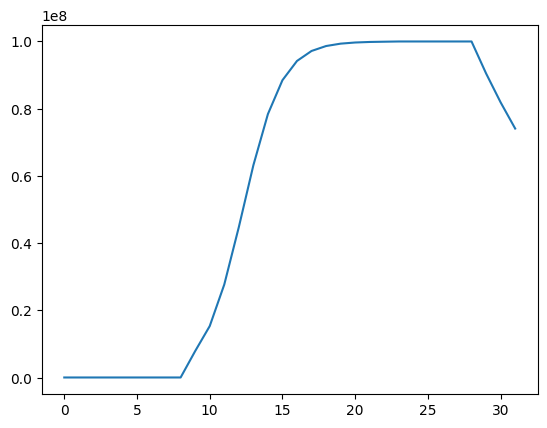

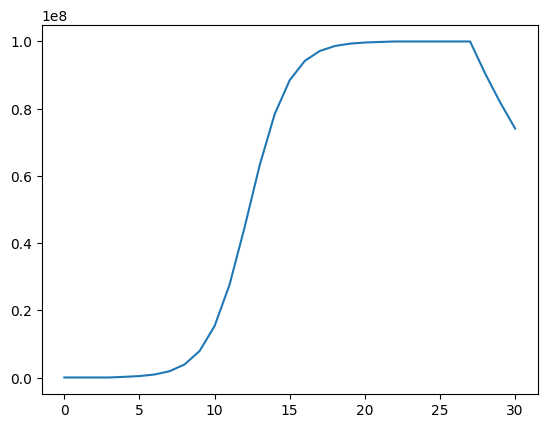

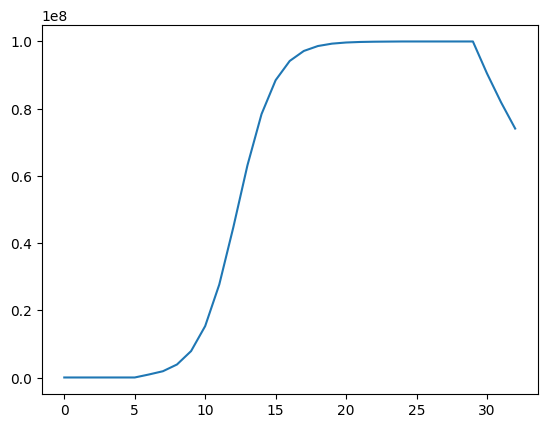

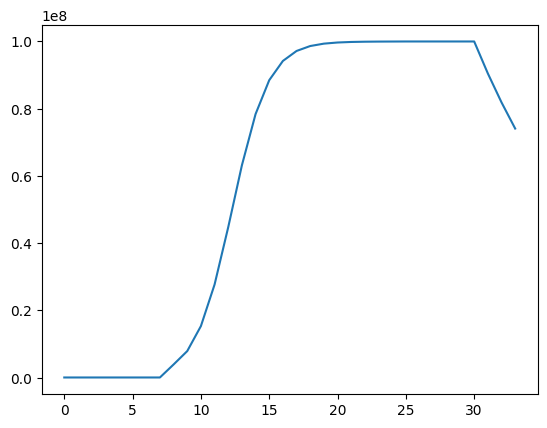

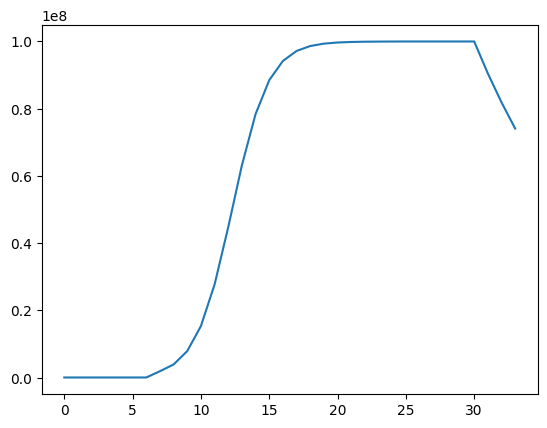

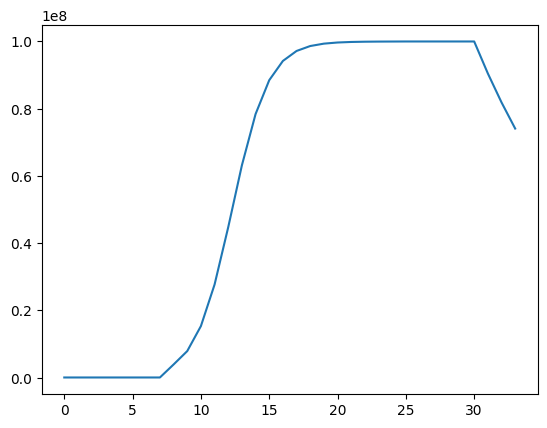

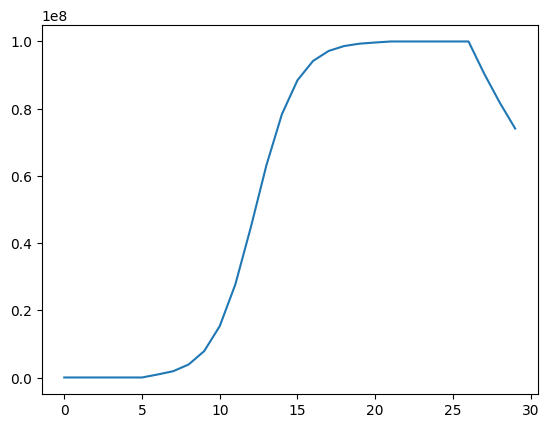

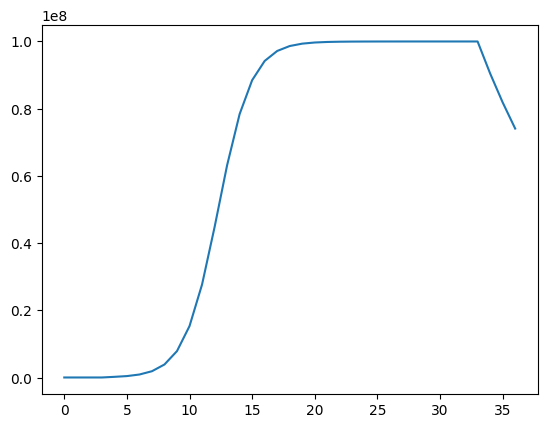

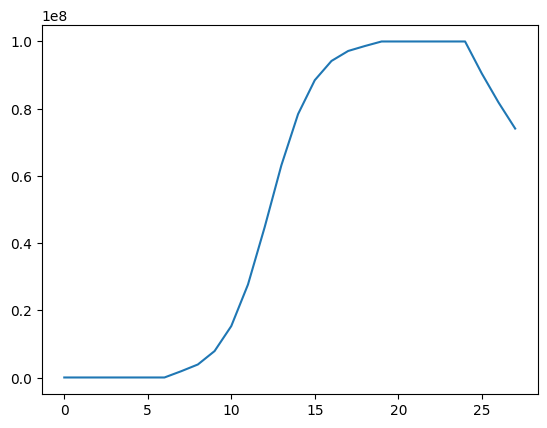

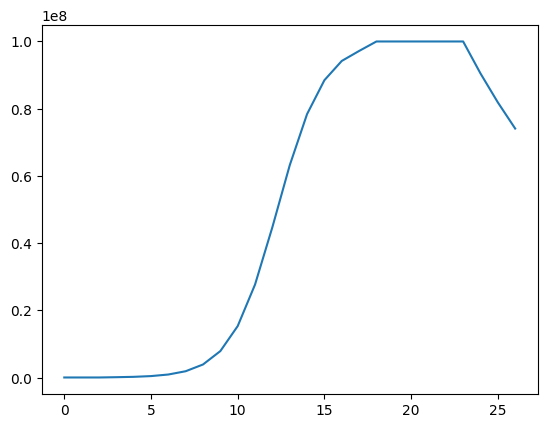

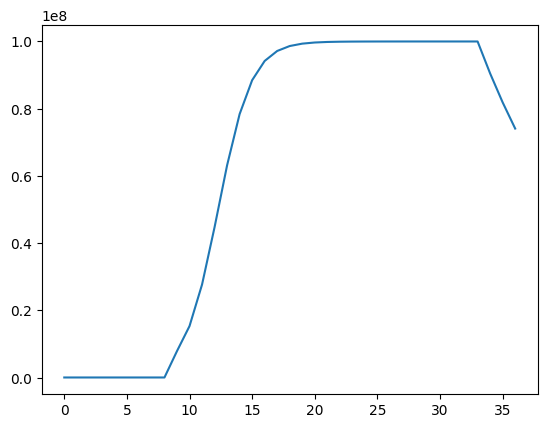

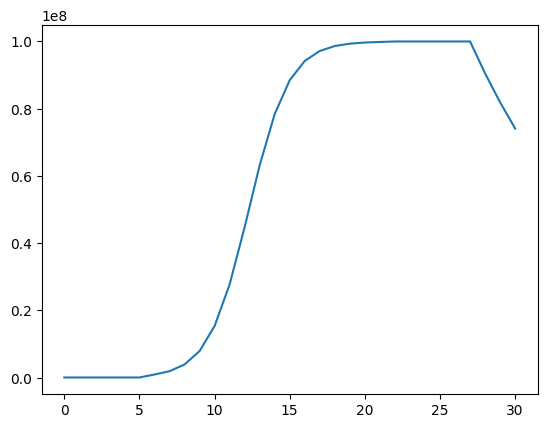

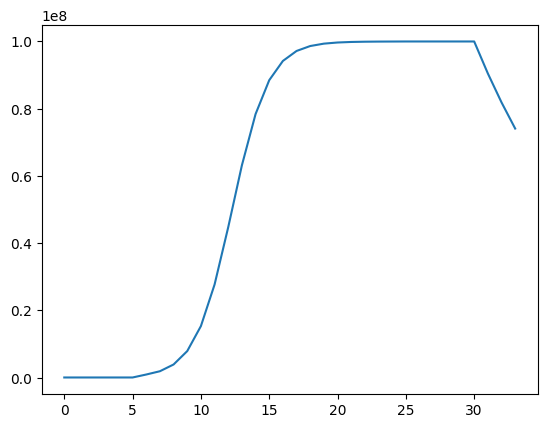

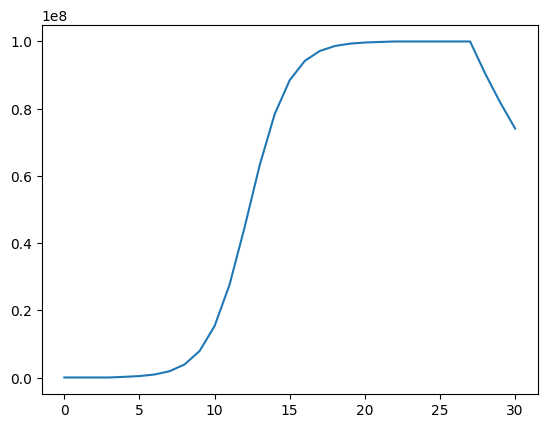

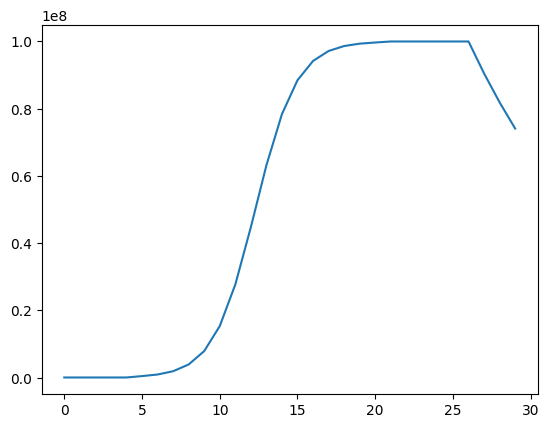

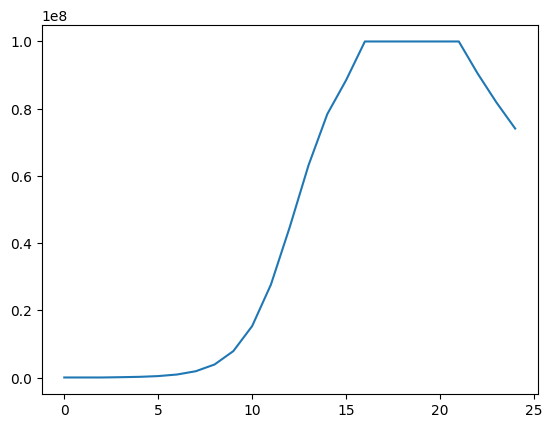

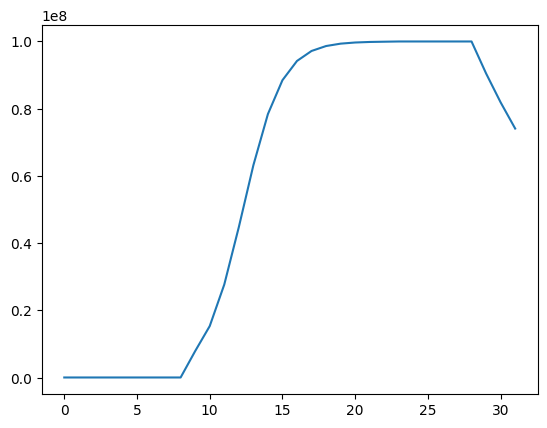

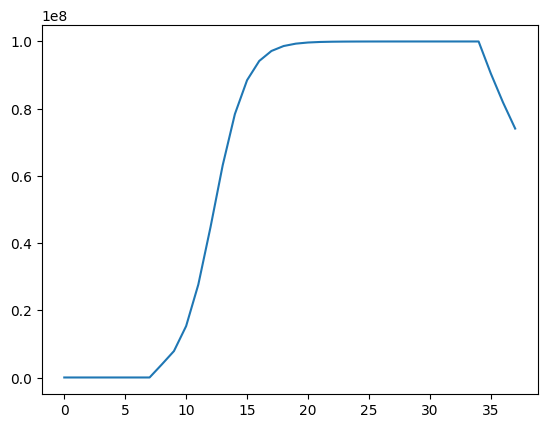

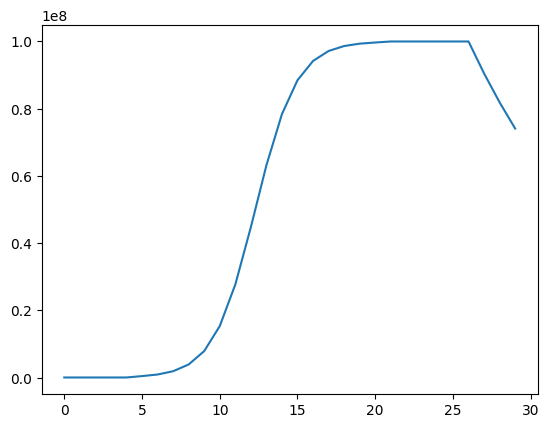

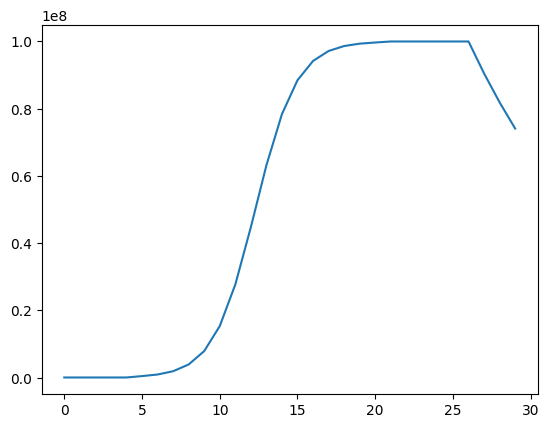

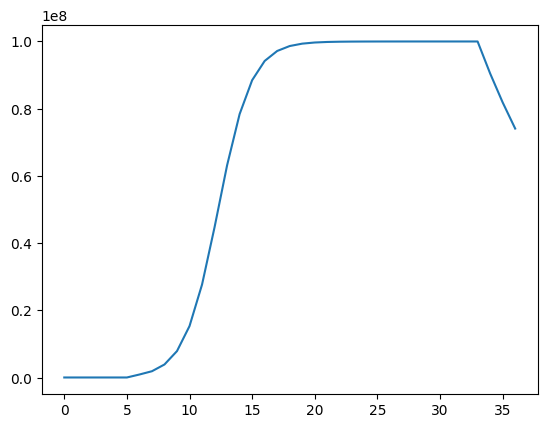

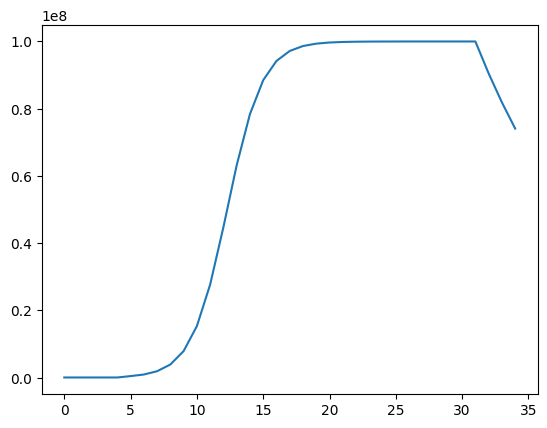

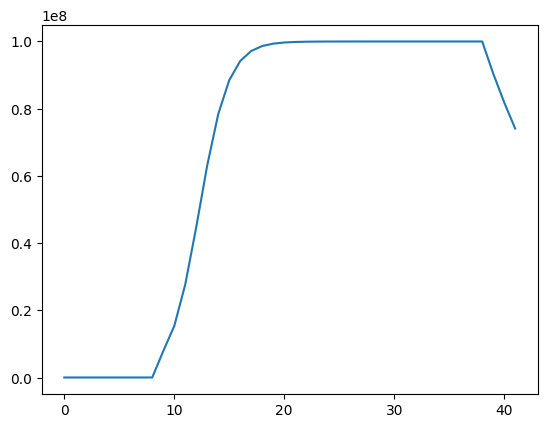

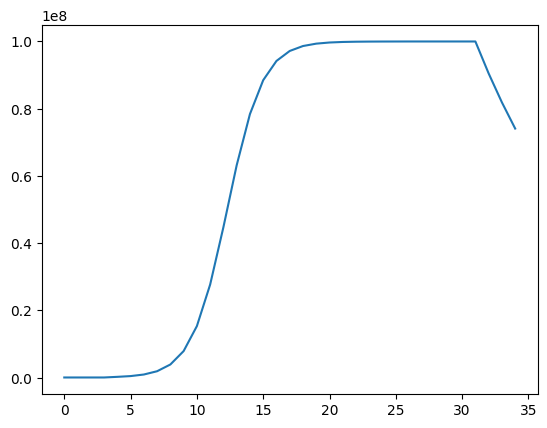

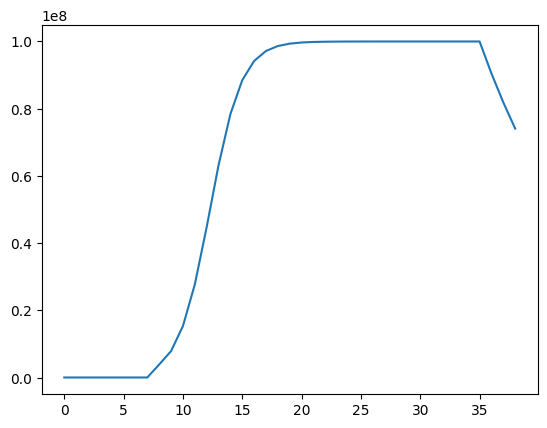

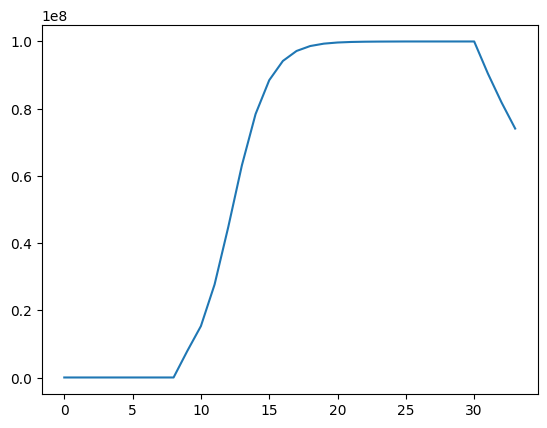

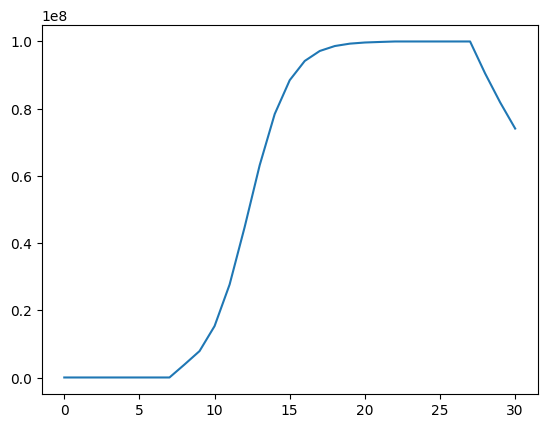

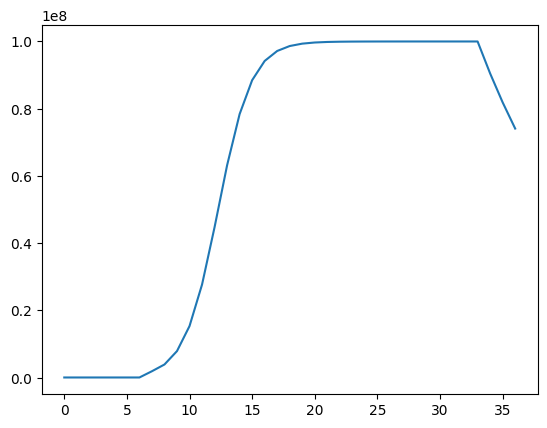

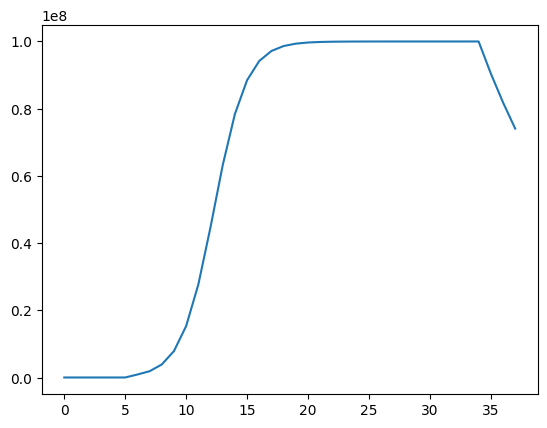

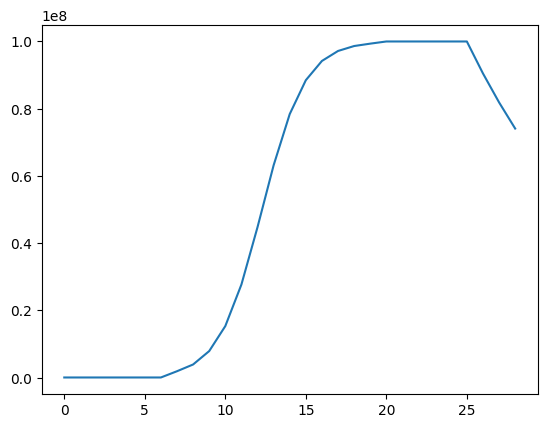

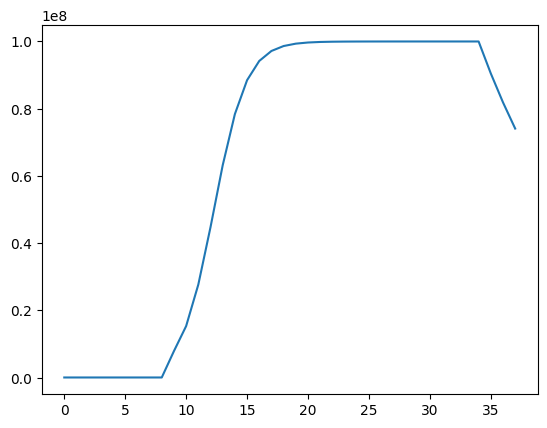

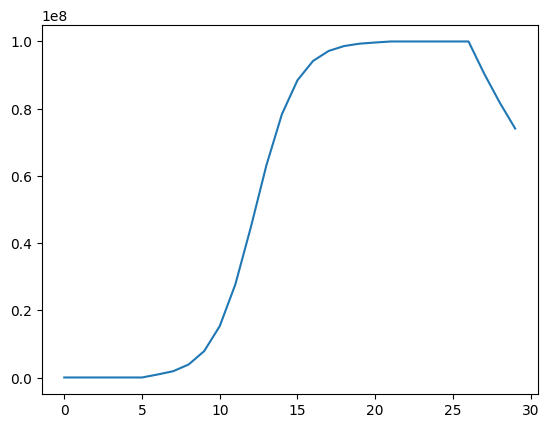

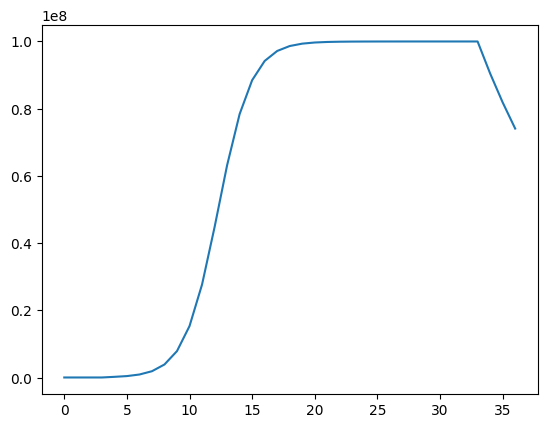

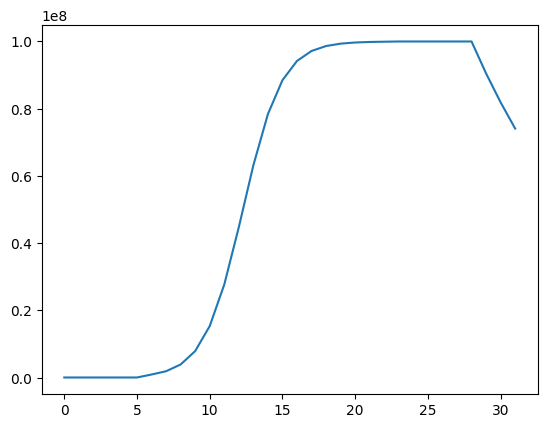

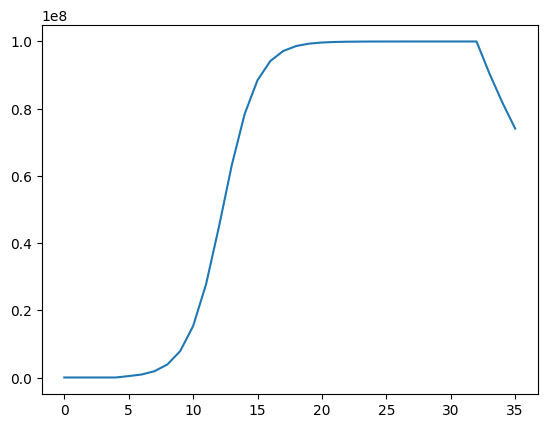

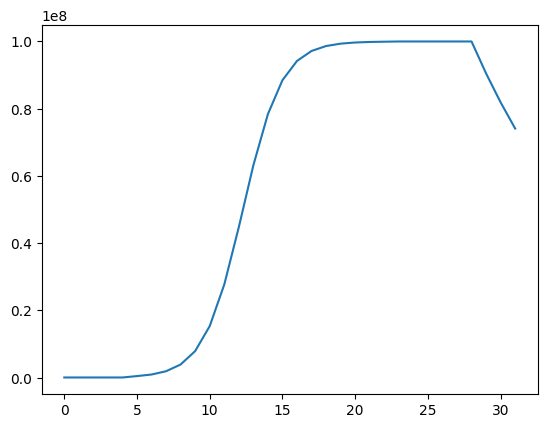

In [19]:
datasets = []
for i in range(100):
    data = pop_t()
    datasets.append(data)

i = 0
while i in range(100):
    plt.plot(datasets[i]['t(hrs)'], datasets[i]['P_t(CFU/mL)'])
    plt.show()
    
    i += 1

In [13]:
datasets[2]

,t(hrs),P_t(CFU/mL)
0,0,1.000000e+04
1,1,1.000000e+04
2,2,1.000000e+04
3,3,1.000000e+04
4,4,1.000000e+04
5,5,1.000000e+04
6,6,1.000000e+04
7,7,1.869211e+06
8,8,3.875899e+06
9,9,7.864218e+06


In [4]:
range(24) == range(0, 24)

True

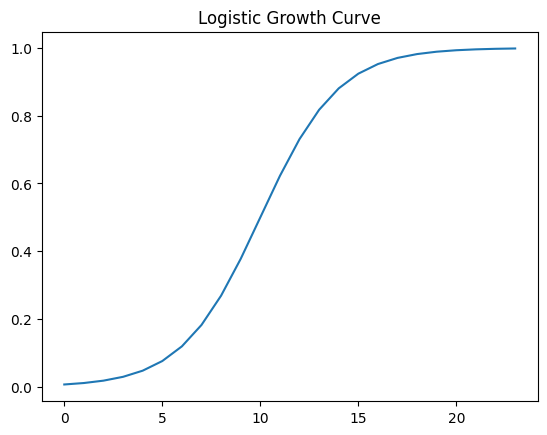

In [3]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

def pop_t(x , k = 0.85, x_midpoint = 7):
    f_x = 1/(1 + math.exp(-k*(x-x_midpoint)))
    return f_x
  
OD600 = []

for i in range(24):
    OD600.append(pop_t(x = i, k = 0.5, x_midpoint = 10))
    
import seaborn as sns
sns.lineplot(x=range(24), y=OD600)
plt.title('Logistic Growth Curve')
plt.show()